# Case Study - Time Series Analysis II
# Sijie Li

In [1]:
import pandas as pd

### 1. Read data

In [2]:
stock_list = pd.read_csv(r'C:\Users\sijie.li\stocklist3.csv', sep='\t')

In [3]:
stock_list.head()

,Date,ABB,AGG,DB,EURUSD=X,EXSA.DE,F,GD=F,GM,GOOG,SNAP,SPY,TSLA,UBER,VOW3.DE
0,2019-05-06 00:00:00-04:00,16.746504,101.046242,7.573730,NaN,NaN,9.633222,435.649994,36.196560,58.213501,10.49,271.968994,15.968000,41.570000,NaN
1,2019-05-13 00:00:00-04:00,17.218025,101.381027,7.294647,NaN,NaN,9.549695,442.600006,35.346336,58.115002,11.49,269.835510,14.068667,41.910000,NaN
2,2019-05-20 00:00:00-04:00,17.081949,101.734367,6.909706,NaN,NaN,9.122790,426.549988,33.550362,56.673500,11.56,266.946838,12.708667,41.509998,NaN
3,2019-05-27 00:00:00-04:00,16.492294,102.654892,6.627897,NaN,NaN,8.835093,407.500000,31.849915,55.181499,11.89,259.857330,12.344000,40.410000,NaN
4,2019-06-03 00:00:00-04:00,17.444817,102.775780,6.618107,NaN,NaN,9.057827,406.750000,33.903824,53.301998,13.87,271.544159,13.633333,44.160000,NaN


In [44]:
# making Data as an Index
##stock_list.set_index('Date',inplace = True)

In [51]:
### set the index to datetimeindex
### stock_list.set_index(pd.to_datetime(stock_list.index))

In [4]:
#Format to single date for daily analysis
stock_list['Date'] = pd.to_datetime(stock_list['Date'],utc=True).dt.date

In [5]:
#Since there are open and close date, chose the Max one to present adj close
stock_list2 = stock_list.groupby('Date').max()

In [6]:
stock_list2.head()

,ABB,AGG,DB,EURUSD=X,EXSA.DE,F,GD=F,GM,GOOG,SNAP,SPY,TSLA,UBER,VOW3.DE
Date,,,,,,,,,,,,,,
2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.246094
2015-12-28,13.848880,92.144127,22.736370,1.085399,NaN,10.446765,312.299988,28.295010,37.944000,NaN,180.575592,16.000668,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,34.160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.734009
2016-01-04,12.739721,92.698654,20.806368,1.094104,NaN,9.297548,295.000000,24.567823,35.723499,NaN,169.991058,14.066667,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN,33.040001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.072433


In [98]:
stock_list2.describe()

,ABB,AGG,DB,EURUSD=X,EXSA.DE,F,GD=F,GM,GOOG,SNAP,SPY,TSLA,UBER,VOW3.DE
count,314.000000,314.000000,314.000000,314.000000,313.000000,314.000000,290.000000,314.000000,314.000000,253.000000,314.000000,314.000000,139.000000,314.000000
mean,21.417202,102.492841,12.240194,1.144211,38.099968,9.643138,414.675893,36.218700,66.373702,25.992885,278.218802,71.885936,40.596115,133.376777
std,5.834211,7.482933,3.766170,0.045808,3.773222,2.592386,68.376134,10.160500,30.294047,20.309308,76.783846,94.845135,9.452067,29.565142
min,12.544446,92.144135,5.639097,1.044998,28.815001,4.128264,250.399994,17.998907,33.761002,4.990000,165.305542,10.069333,21.330000,79.182259
25%,17.227096,96.040852,8.899845,1.113177,35.435001,8.464149,370.899994,29.728479,46.405124,13.270000,221.295483,16.759333,32.584999,115.255880
50%,19.785091,97.993908,12.126117,1.136249,37.790001,9.312478,406.875000,34.154419,56.830999,16.500000,260.425110,21.766666,40.320000,127.152538
75%,23.401770,111.449230,15.524750,1.179716,39.270000,10.142138,453.587494,38.233232,73.805002,27.830000,315.652985,77.114666,47.535000,145.439243
max,37.191761,114.523201,22.736370,1.246401,48.325001,20.989895,593.630005,63.255581,149.952499,83.110001,469.523773,407.363342,60.630001,226.989944


### 2. Bollinger Bands Analysis

The default values are 20 for period, and 2 for standard deviations, although you may customize the combinations. Bollinger bands help determine whether prices are high or low on a relative basis. They are used in pairs, both upper and lower bands and in conjunction with a moving average.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
SPY = pd.DataFrame(stock_list2['SPY'].dropna())

In [9]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

Bollinger (20,2) -- 20 periods and std = 2

In [10]:
SPY['sma_20'] = sma(SPY['SPY'].dropna(), 20)
SPY.tail()

,SPY,sma_20
Date,,
2021-11-29,446.661102,442.255022
2021-12-06,463.722900,443.841263
2021-12-13,453.014923,444.962315
2021-12-20,465.213684,446.497899
2021-12-27,469.523773,448.080580


In [13]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2 # Calculate top band
    lower_bb = sma - std * 2 # Calculate bottom band
    return upper_bb, lower_bb

SPY['upper_bb'], SPY['lower_bb'] = bb(SPY['SPY'], SPY['sma_20'], 20)
SPY.tail()

,SPY,sma_20,upper_bb,lower_bb
Date,,,,
2021-11-29,446.661102,442.255022,463.580781,420.929262
2021-12-06,463.722900,443.841263,466.624381,421.058145
2021-12-13,453.014923,444.962315,467.200794,422.723836
2021-12-20,465.213684,446.497899,469.905733,423.090064
2021-12-27,469.523773,448.080580,473.246585,422.914575


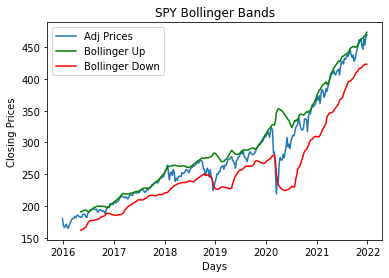

In [15]:
# Plot the data
plt.title('SPY Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(SPY['SPY'], label='Adj Prices')
plt.plot(SPY['upper_bb'], label='Bollinger Up', c='g')
plt.plot(SPY['lower_bb'], label='Bollinger Down', c='r')
plt.legend()
plt.show()

Pease describe the relationship between the parameters 
(k,N) and the analytical results

* What statistical attributes for any given price time-series would potentially make the Bollinger Bands less and more useful as the basis for a trading strategy?

Please be prepared to discuss these results and comments further.

### Answer:  Bollinger bands are two standard deviations away from the SMA. When calculating them, the formula we would use for the top band is sma + std x 2 and the bottom bands would be sma — std x 2. We can observe that whenever the stock’s close price below the lower band, a buy signal is observed, similarly, whenever the stock’s close price crosses above the upper band , a sell signal is observed.

If we choose a larger N, the width of the band will be larger. The the increase of k will result in decresing in volitality. The increase of k will potentially decrese the std of N. So if the k is larger, the band will be tider. If N is larger, the bond will be enlarged.


Bollinger (60,1.5) -- 60 periods and std = 1.5

In [16]:
def bb2(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 1.5 # Calculate top band
    lower_bb = sma - std * 1.5 # Calculate bottom band
    return upper_bb, lower_bb

SPY['upper_bb'], SPY['lower_bb'] = bb2(SPY['SPY'], SPY['sma_20'], 60)
SPY.tail()

,SPY,sma_20,upper_bb,lower_bb
Date,,,,
2021-11-29,446.661102,442.255022,498.587643,385.922400
2021-12-06,463.722900,443.841263,499.957022,387.725503
2021-12-13,453.014923,444.962315,500.224169,389.700462
2021-12-20,465.213684,446.497899,500.089903,392.905895
2021-12-27,469.523773,448.080580,501.230170,394.930991


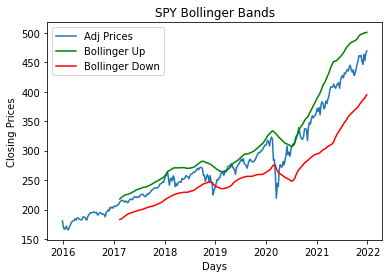

In [17]:
# Plot the data
plt.title('SPY Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(SPY['SPY'], label='Adj Prices')
plt.plot(SPY['upper_bb'], label='Bollinger Up', c='g')
plt.plot(SPY['lower_bb'], label='Bollinger Down', c='r')
plt.legend()
plt.show()

Pease describe the relationship between the parameters 
(k,N) and the analytical results

What statistical attributes for any given price time-series would potentially make the Bollinger Bands less and more useful as the basis for a trading strategy?

#### ANSEWR: The historical price over time will have impact to the BB strategies if the standard deviation change dramatically.

### 3.  Prompt 4: Extending the analysis

In [18]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal


In [19]:
buy_price, sell_price, bb_signal = implement_bb_strategy(SPY['SPY'], SPY['lower_bb'], SPY['upper_bb'])

IF PREV_STOCK > PREV_LOWERBB & CUR_STOCK < CUR_LOWER_BB => BUY

IF PREV_STOCK < PREV_UPPERBB & CUR_STOCK > CUR_UPPER_BB => SELL

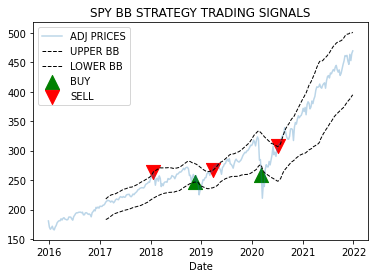

In [20]:
SPY['SPY'].plot(label = 'ADJ PRICES', alpha = 0.3)
SPY['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
SPY['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(SPY.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(SPY.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('SPY BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

### 4.  Prompt 5: Computing daily returns series

In [21]:
stock_list['VOW3.DE'] = stock_list['VOW3.DE'] * stock_list['EURUSD=X'] 
stock_list['EXSA.DE'] = stock_list['EXSA.DE'] * stock_list['EURUSD=X'] 

In [24]:
stock_list['VOW3.DE'] * stock_list['EURUSD=X'] 

Date
2015-12-27   NaN
2015-12-28   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-10   NaN
              ..
2021-12-17   NaN
2021-12-19   NaN
2021-12-20   NaN
2021-12-26   NaN
2021-12-27   NaN
Length: 739, dtype: float64

In [9]:
ADJ_USD_CLOSE = stock_list2
ADJ_USD_CLOSE.head()

,ABB,AGG,DB,EURUSD=X,EXSA.DE,F,GD=F,GM,GOOG,SNAP,SPY,TSLA,UBER,VOW3.DE
Date,,,,,,,,,,,,,,
2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.246094
2015-12-28,13.848880,92.144127,22.736370,1.085399,NaN,10.446765,312.299988,28.295010,37.944000,NaN,180.575592,16.000668,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,34.160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.734009
2016-01-04,12.739721,92.698654,20.806368,1.094104,NaN,9.297548,295.000000,24.567823,35.723499,NaN,169.991058,14.066667,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN,33.040001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.072433


#### Return Table of each ticker

In [17]:
RET = ADJ_USD_CLOSE.pct_change()
RET.head()

,ABB,AGG,DB,EURUSD=X,EXSA.DE,F,GD=F,GM,GOOG,SNAP,SPY,TSLA,UBER,VOW3.DE
Date,,,,,,,,,,,,,,
2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2016-01-03,0.00000,0.000000,0.000000,0.00000,NaN,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,0.00000,NaN,-0.139439
2016-01-04,-0.08009,0.006018,-0.084886,0.00802,0.000000,-0.110007,-0.055395,-0.131726,-0.05852,NaN,-0.058616,-0.12087,NaN,0.000000
2016-01-10,0.00000,0.000000,0.000000,0.00000,-0.032787,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,0.00000,NaN,-0.027802


In [22]:
RET_SD = np.std(RET)
RET_SD

ABB         0.023681
AGG         0.004003
DB          0.038116
EURUSD=X    0.006587
EXSA.DE     0.015160
F           0.034024
GD=F        0.019372
GM          0.034704
GOOG        0.021458
SNAP        0.060691
SPY         0.015699
TSLA        0.053798
UBER        0.052555
VOW3.DE     0.032787
dtype: float64

### 5.  Prompt 6: Describing relationships between returns series

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
ReturnCorr = RET.corr()
ReturnCorr = ReturnCorr.unstack()
ReturnCorr = ReturnCorr[abs(ReturnCorr) >= 0.7]
ReturnCorr = ReturnCorr[abs(ReturnCorr) < 1 ]

#### According to the correlation table, strong relationships have been found in the following pairs.

In [88]:
ReturnCorr #the correlation > 0.7 pairs 

ABB   SPY     0.700597
F     GM      0.820576
GM    F       0.820576
GOOG  SPY     0.717131
SPY   ABB     0.700597
      GOOG    0.717131
dtype: float64

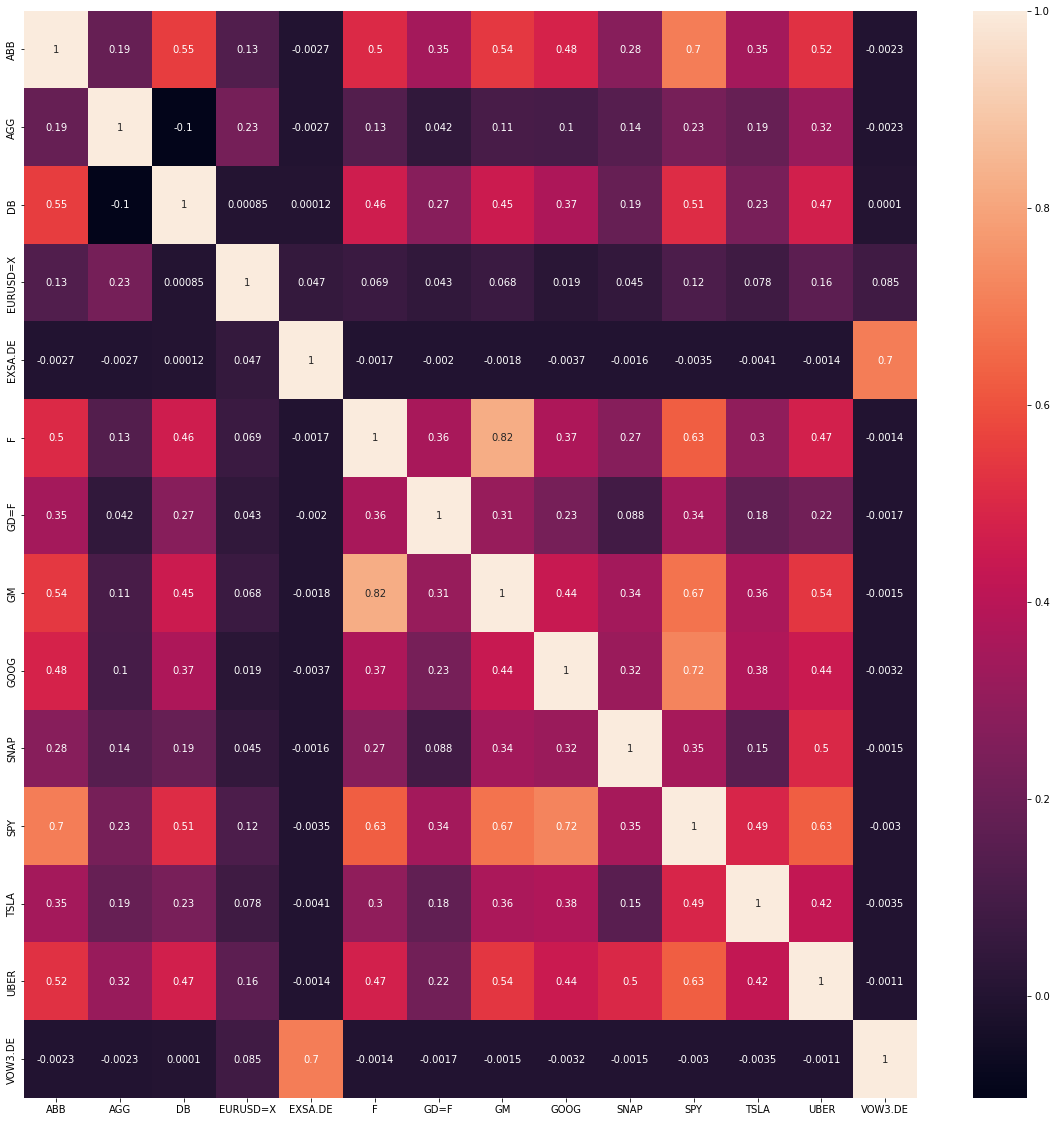

In [84]:
#Overview of all pairs in collinear relationships
ReturnCorr2 = RET.corr()
plt.figure(figsize=(20,20))
sns.heatmap(ReturnCorr2, annot=True)
plt.show()

If you could have only picked 4 ticker out of the 16 to hold in an investment portfolio, in equal weight, over the period of the data, which 4 tickers would likely result in a portfolio with lowest volatility (i.e. lower standard deviation of daily returns)? Although we intend to discuss this question mostly from a qualitative perspective, please feel free to substantiate your comments with further quantitative analysis, including graphs and tables, if you feel it would be helpful.

### ANSWER:

##### I might choose one among (ABB, SPY, GOOG), as they are strong positive correlated, and choose one between F and GM. They all not high fluctuated, but I will choose a ticker with the lowerest volatility (AGG) for safety. And the last one, I will go with a most risky ticker for possible higher return (SNAP)  to the profolio.

We can sometimes study the correlations characteristics of a particular ticker, say for instance for a new company we are interesting in analysing, to make some simplifying high-level assumptions. Please graph the rolling 6-month correlations of TSLA to F, GM, GOOG, and SNAP, and provide brief written comments to addres the following question:

Given that F and GM are car manufacturing companies while GOOG and SNAP are technology services companies, what industry would you think TSLA falls into (it does not have to be either of the two industries spanned by the other 4 tickers), and why?

In [26]:
#calculate 6-month rolling correlation between sales for x and y
list1 = ['TSLA','F','GM','GOOG','SNAP']
RET[list1].rolling(6).corr().dropna()

TSLA         F        GM      GOOG      SNAP
Date                                                             
2017-03-13 TSLA  1.000000  0.147020  0.457958  0.031979 -0.034714
           F     0.147020  1.000000  0.946643 -0.983926  0.983434
           GM    0.457958  0.946643  1.000000 -0.873874  0.872540
           GOOG  0.031979 -0.983926 -0.873874  1.000000 -0.999996
           SNAP -0.034714  0.983434  0.872540 -0.999996  1.000000
...                   ...       ...       ...       ...       ...
2021-12-27 TSLA  1.000000  0.553242  0.605391  0.925537  0.948533
           F     0.553242  1.000000  0.997952  0.196617  0.260970
           GM    0.605391  0.997952  1.000000  0.258929  0.322182
           GOOG  0.925537  0.196617  0.258929  1.000000  0.997815
           SNAP  0.948533  0.260970  0.322182  0.997815  1.000000

[2935 rows x 5 columns]

#### ANSWER: market aspect, TSLA is more acknowledged as a car manufacturing. Supported by the analysis, in earlier years, it was more correlated with F, GM; However in lastest year, it was closer to GOOG, SNAP.

We can also use construct linear regression models to analyse the performance characteristics of returns series. For example, given that the SPY represents (very approximately) the performance of market for Large Cap US companies, if we think that the performance of UBER can be described as some function of the return of the broader markets, an idiosyncratic component, plus some noise, we can construct a linear relationship between SPY and UBER specified by

R
e
t
U
B
E
R
=
α
+
β
∗
R
e
t
S
P
Y
+
ϵ
Using whatever method you feel most comfortable with, please perform a linear regression analysis on this hypothesized relationship using the full period of available data, tabulating your full results below. While we do not have specific prompts for written comments, please be prepared to briefly discuss the results of the linear regression analysis, including your methods.

In [27]:
from sklearn.linear_model import LogisticRegression

In [123]:
X = stock_list2['SPY'].fillna(stock_list2['SPY'].mean(), inplace=True)
Y = stock_list2['UBER'].fillna(stock_list2['UBER'].mean(), inplace=True)

In [165]:
x = stock_list2['SPY']
y = stock_list2['UBER']

In [166]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [170]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)


[ 72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72  72
  72  72  72  72  72  72  72  72  72  72  72  72  7

C:\Users\sijie.li\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.30, random_state = 2)

In [172]:
lr = LogisticRegression(random_state = 0)

lr.fit(X_train, y_train)

C:\Users\sijie.li\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.8108108108108109